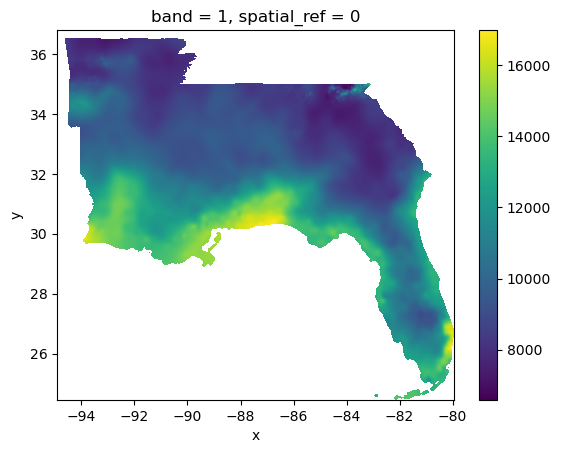

In [14]:
import xarray as xr
# import rasterio as rio
import rioxarray

da = rioxarray.open_rasterio('data\se100yr24ha\se100yr24ha.asc', masked=True)
da.squeeze().plot.imshow()

In [15]:
da

<xarray.DataArray (band: 1, y: 1480, x: 1796)>
[2658080 values with dtype=float64]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -94.92 -94.91 -94.9 -94.89 ... -79.98 -79.97 -79.96
  * y            (y) float64 36.79 36.78 36.77 36.77 ... 24.49 24.48 24.47 24.47
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [7]:
import pandas as pd
# pd.read_csv("data\se_1_24h_temporal.csv")
with open(r"data\Texas\tx_3_24h_temporal.csv", "r") as f:
    data = f.readlines()
# data.strip('\n')

In [8]:
table_start_indexes = [i for i,v in enumerate(data) if "CUMULATIVE PERCENTAGES OF TOTAL PRECIPITATION" in v]
table_start_indexes

[6, 60, 114, 168, 222]

In [15]:
table_titles = [v for i,v in enumerate(data) if "CUMULATIVE PERCENTAGES OF TOTAL PRECIPITATION FOR" in v]
table_titles = [v.split("CUMULATIVE PERCENTAGES OF TOTAL PRECIPITATION FOR")[-1].rstrip("CASES\n").strip() for v in table_titles]
table_titles  

['FIRST-QUARTILE',
 'SECOND-QUARTILE',
 'THIRD-QUARTILE',
 'FOURTH-QUARTILE',
 'ALL']

In [16]:
# table_headers are +2 from the table_start_index
from io import StringIO


length_tables = len(table_start_indexes)
for i,table in enumerate(table_start_indexes):
    table_header_index = table + 2
    # ensure not at end of table before using the next table start index.
    if i < length_tables - 1:
        table = data[table_header_index:table_start_indexes[i+1]]
        table = [v.rstrip("\n") for v in table]
        # print (*table)
        df_table = pd.read_csv(StringIO("\n".join(table)), sep=",", header=0)
    else: # last table just grabs to end of file
        table = data[table_header_index:]
        table = [v.rstrip("\n") for v in table]
        df_table = pd.read_csv(StringIO("\n".join(table)), sep=",", header=0)
    

In [17]:
df_table['50%']

0       0.00
1       1.30
2       3.12
3       5.27
4       7.67
5      10.28
6      13.03
7      15.88
8      18.73
9      21.56
10     24.31
11     26.99
12     29.59
13     32.15
14     34.69
15     37.25
16     39.85
17     42.51
18     45.22
19     47.98
20     50.75
21     53.52
22     56.25
23     58.92
24     61.51
25     64.02
26     66.46
27     68.84
28     71.18
29     73.51
30     75.84
31     78.18
32     80.54
33     82.88
34     85.18
35     87.39
36     89.47
37     91.37
38     93.07
39     94.54
40     95.80
41     96.86
42     97.76
43     98.52
44     99.15
45     99.63
46     99.90
47     99.98
48    100.00
Name: 50%, dtype: float64

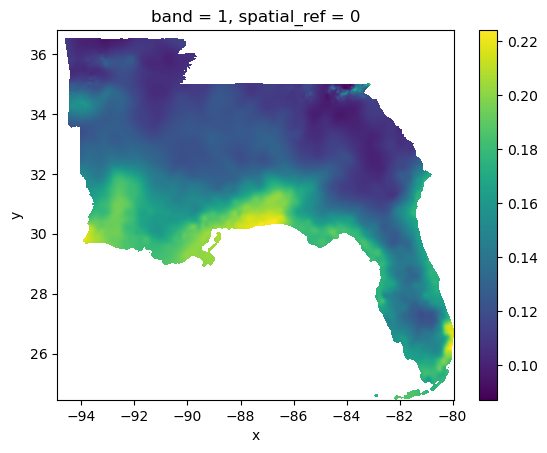

In [20]:
# Convert units to inches.
da = da/1000
# Convert Units to the 50% Occurance Temporal Value increment to create a dataarray to be stacked into a dataset with a time dimension.
da = da*(df_table['50%'][1]/100)
da.squeeze().plot.imshow()

In [21]:
import datetime

df_table['hours'][1]
start_time = datetime.datetime.utcfromtimestamp(0) +  datetime.timedelta(hours=1)
timestep = start_time + datetime.timedelta(hours=df_table['hours'][1])
print(timestep)

1970-01-01 01:30:00


In [22]:
da = da.assign_coords(time = timestep)
da = da.expand_dims(dim="time")
da

<xarray.DataArray (time: 1, band: 1, y: 1480, x: 1796)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -94.92 -94.91 -94.9 -94.89 ... -79.98 -79.97 -79.96
  * y            (y) float64 36.79 36.78 36.77 36.77 ... 24.49 24.48 24.47 24.47
    spatial_ref  int32 0
  * time         (time) datetime64[ns] 1970-01-01T01:30:00

In [23]:
# Assign Temporal Distribution to Grid
# da.values = da.values * df_table['50%'][1]


In [24]:
grids = {
    '002yr_Partial_Duration_24hPrecip': {
        'path': 'data\se2yr24ha\se2yr24ha.asc',
    },
    '005yr_Partial_Duration_24hPrecip': {
        'path': 'data\se5yr24ha\se5yr24ha.asc',
    },
    '010yr_Partial_Duration_24hPrecip': {
        'path': 'data\se10yr24ha\se10yr24ha.asc',
    },
    '025yr_Partial_Duration_24hPrecip': {
        'path': 'data\se25yr24ha\se25yr24ha.asc',
    },
    '50yr_Partial_Duration_24hPrecip': {
        'path': 'data\se50yr24ha\se50yr24ha.asc',
    },
    '100yr_Partial_Duration_24hPrecip': {
        'path': 'data\se100yr24ha\se100yr24ha.asc',
    },
    '500yr_Partial_Duration_24hPrecip': {
        'path': 'data\se500yr24ha\se500yr24ha.asc',
    },
    '100yr_Partial_Duration_05mPrecip': {
        'path': 'data\se100yr05ma\se100yr05ma.asc',
    },
    '100yr_Partial_Duration_06hPrecip': {
        'path': 'data\se100yr06ha\se100yr06ha.asc',
    },
    '100yr_Partial_Duration_12hPrecip': {
        'path': 'data\se100yr12ha\se100yr12ha.asc',
    },
    '100yr_Partial_Duration_60mPrecip': {
        'path': 'data\se100yr60ma\se100yr60ma.asc',
    },
}

In [25]:
for grid in grids:
    grid_name = grid
    grid_file = grids[grid]['path']

SyntaxError: unmatched ')' (1444675288.py, line 3)

In [27]:
import xarray as xr
ds = xr.open_dataset('Z:\py\Atlas14_temporal_distribution\output\Atlas14_002yr_Partial_Duration_24hPrecip_24hDistribution_50PercentOccurence_ALL.nc')
ds

<xarray.Dataset>
Dimensions:      (band: 1, x: 1796, y: 1480, time: 49)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -94.92 -94.91 -94.9 -94.89 ... -79.98 -79.97 -79.96
  * y            (y) float64 36.79 36.78 36.77 36.77 ... 24.49 24.48 24.47 24.47
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 1970-01-01T01:00:00 ... 1970-01-02T01:...
Data variables:
    Precip       (time, band, y, x) float64 ...

In [28]:
ds = ds.rename({
    'x':'longitude',
    'y':'latitude'
})


In [37]:
ds = ds.squeeze()
ds = ds.drop_vars('band')
ds

<xarray.Dataset>
Dimensions:      (longitude: 1796, latitude: 1480, time: 49)
Coordinates:
  * longitude    (longitude) float64 -94.92 -94.91 -94.9 ... -79.97 -79.96
  * latitude     (latitude) float64 36.79 36.78 36.77 ... 24.48 24.47 24.47
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 1970-01-01T01:00:00 ... 1970-01-02T01:...
Data variables:
    Precip       (time, latitude, longitude) float64 ...

In [38]:
ds['latitude'].attrs['units'] = 'degrees_north'
ds['latitude'].attrs['standard_name'] = 'latitude'
ds['latitude'].attrs['long_name'] = 'latitude'
ds['latitude'].attrs['axis'] = 'Y'

ds['longitude'].attrs['units'] = 'degrees_east'
ds['longitude'].attrs['standard_name'] = 'longitude'
ds['longitude'].attrs['long_name'] = 'longitude'
ds['longitude'].attrs['axis'] = 'X'

ds['time'].attrs['standard_name'] = 'time'
ds['time'].attrs['long_name'] = 'time'
ds['time'].attrs['axis'] = 'T'

ds['Precip'].attrs['units'] = 'inches'
ds['Precip'].attrs['long_name'] = 'Incremental Precipitation'

ds


<xarray.Dataset>
Dimensions:      (longitude: 1796, latitude: 1480, time: 49)
Coordinates:
  * longitude    (longitude) float64 -94.92 -94.91 -94.9 ... -79.97 -79.96
  * latitude     (latitude) float64 36.79 36.78 36.77 ... 24.48 24.47 24.47
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 1970-01-01T01:00:00 ... 1970-01-02T01:...
Data variables:
    Precip       (time, latitude, longitude) float64 ...

In [39]:
ds.to_netcdf('t.nc')

In [40]:
ds.close()